In [6]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [7]:
model = ResNet50(weights='imagenet')


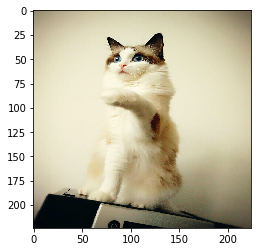

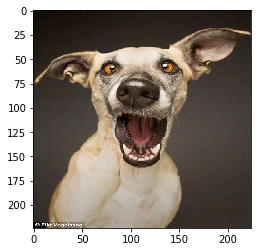

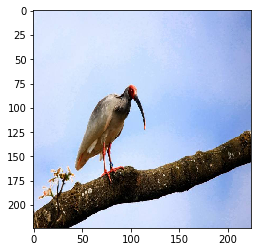

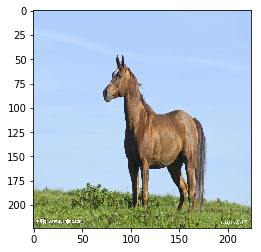

In [8]:
img_names = ['cat.jpg','dog.jpg','bird.jpg','horse.jpg']
ims = [image.load_img(img_path, target_size=(224, 224)) for img_path in img_names]
for im in ims:
    plt.imshow(im)
    plt.show()

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

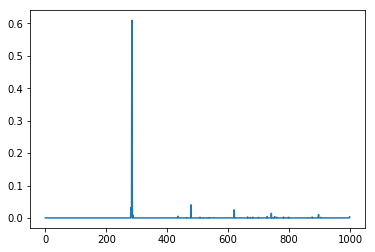

[('n02123597', 'Siamese_cat', 0.60981649), ('n02124075', 'Egyptian_cat', 0.19287249), ('n02971356', 'carton', 0.040341884)]


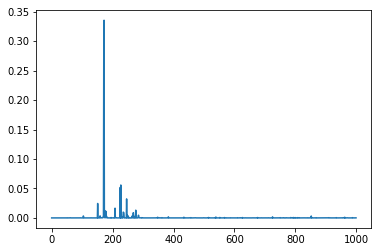

[('n02091134', 'whippet', 0.33543235), ('n02091032', 'Italian_greyhound', 0.28223833), ('n02105412', 'kelpie', 0.055873863)]


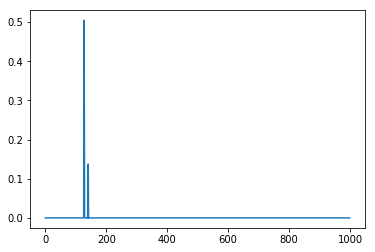

[('n02002556', 'white_stork', 0.50459725), ('n02002724', 'black_stork', 0.35431686), ('n02028035', 'redshank', 0.13744678)]


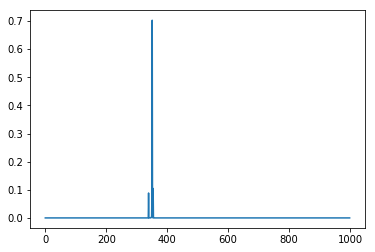

[('n02422106', 'hartebeest', 0.70258915), ('n02437312', 'Arabian_camel', 0.10461576), ('n02389026', 'sorrel', 0.088583514)]


In [10]:
images = [np.expand_dims(image.img_to_array(im), axis=0) for im in ims]
images = [preprocess_input(image) for image in images]
res = [model.predict(image) for image in images]
for r in res:
    plt.plot(r.ravel())
    plt.show()
    print(decode_predictions(r, top=3)[0])